In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets.mnist import load_data as load_mnist

In [ ]:
mnist =  load_mnist()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist

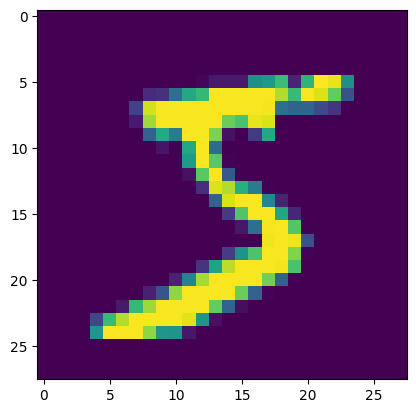

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]);

In [ ]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=48, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
      ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 24)     │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 48)     │        10,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       153,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,674 (647.16 KB)

 Trainable params: 165,674 (647.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train_4_dim = x_train.reshape(60000, 28, 28, 1)
y_train_4_dim = y_train.reshape(60000, 1)

In [ ]:
model_history = model.fit(x_train_4_dim, y_train_4_dim, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9817 - loss: 0.0612
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 21ms/step - accuracy: 0.9861 - loss: 0.0452
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9881 - loss: 0.0379
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9904 - loss: 0.0322
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9914 - loss: 0.0267


In [ ]:
history_dict = model_history.history
history_dict.keys()


dict_keys(['accuracy', 'loss'])

In [32]:
model_history_with_validation = model.fit(x_train_4_dim, y_train_4_dim, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9932 - loss: 0.0220 - val_accuracy: 0.9907 - val_loss: 0.0304
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9950 - loss: 0.0177 - val_accuracy: 0.9902 - val_loss: 0.0341
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9951 - loss: 0.0162 - val_accuracy: 0.9923 - val_loss: 0.0296
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9955 - loss: 0.0137 - val_accuracy: 0.9883 - val_loss: 0.0425
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9956 - loss: 0.0144 - val_accuracy: 0.9865 - val_loss: 0.0631


In [35]:
history_dict = model_history_with_validation.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

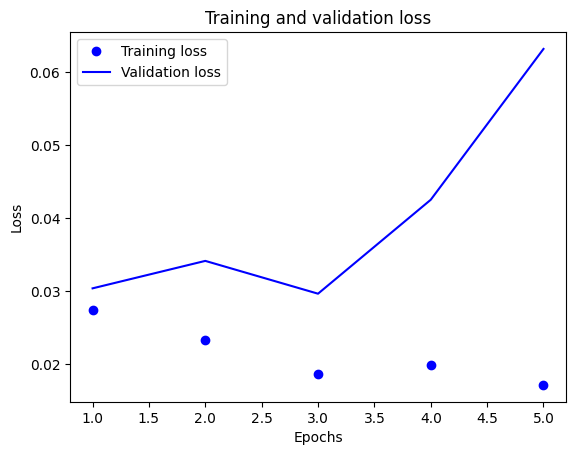

In [36]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']


epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()